In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import sklearn.datasets as sd
import sklearn.utils as su
import sklearn.metrics as sm
import sklearn.model_selection as ms
import sklearn.preprocessing as sp
import sklearn.pipeline as pl
import sklearn.tree as st
import sklearn.ensemble as se
import sklearn.linear_model as lm

In [3]:
import cufflinks as cf
from plotly.offline import iplot, plot
import plotly.graph_objects as go
import plotly.express as px
cf.go_offline()

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('adult.txt', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
for index, cols in data.iteritems():
    for i, v in cols.items():
        if '?' in str(v):
            cols[i] = cols.mode()[0]

info = pd.DataFrame([])
for col in data.columns:
    if data[col].dtype == 'int64':
        info[col] = data[col]
    elif data[col].dtype == 'O':
        lbe = sp.LabelEncoder()
        encoded = lbe.fit_transform(data[col])
        info[col] = pd.Series(encoded)
info.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [7]:
info = info.drop([2, 10], axis=1)

In [8]:
info.head(3)

,0,1,3,4,5,6,7,8,9,11,12,13,14
0,39,6,9,13,4,0,1,4,1,0,40,38,0
1,50,5,9,13,2,3,0,4,1,0,13,38,0
2,38,3,11,9,0,5,1,4,1,0,40,38,0


In [9]:
X = info.drop(14, axis=1)
y = info[14]

## Cross Validation

In [14]:
model = se.RandomForestClassifier(max_depth=12,
                                  n_estimators=450,
                                  min_samples_split=3)
print(ms.cross_val_score(model, X, y, cv=5, scoring='accuracy').mean())

0.845551530656321


## Validation Curve

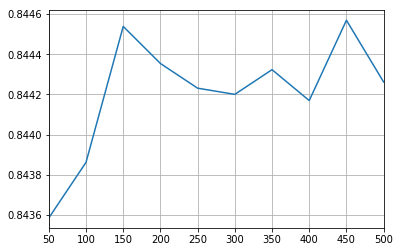

In [11]:
params = np.arange(50, 550, 50)
train_scores, test_scores = ms.validation_curve(model,
                                                X,
                                                y,
                                                'n_estimators',
                                                params,
                                                cv=5)
mean_scores = test_scores.mean(axis=1)
mean_scores = pd.Series(mean_scores, index=params)
mean_scores.plot(grid='on')

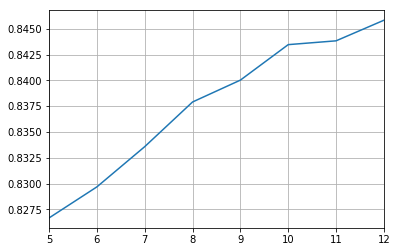

In [13]:
params = np.arange(5, 13, 1)
train_scores, test_scores = ms.validation_curve(model,
                                                X,
                                                y,
                                                'max_depth',
                                                params,
                                                cv=5)
mean_scores = test_scores.mean(axis=1)
mean_scores = pd.Series(mean_scores, index=params)
mean_scores.plot(grid='on')

## Learning Curve

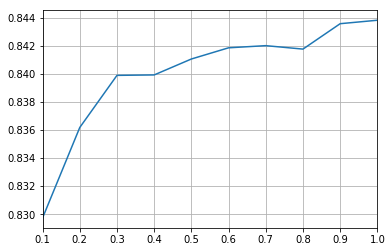

In [12]:
params = np.arange(0.1, 1.1, 0.1)
_, train_scores, test_scores = ms.learning_curve(model,
                                                 X,
                                                 y,
                                                 train_sizes=params)
mean_scores = test_scores.mean(axis=1)
mean_scores = pd.Series(mean_scores, index=params)
mean_scores.plot(grid='on')

## Model Training

In [16]:
X_train, X_test, y_train, y_test = ms.train_test_split(X,
                                                       y,
                                                       test_size=0.2,
                                                       random_state=7)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

## Model Evaluation

In [17]:
print(sm.confusion_matrix(y_test, predictions))

[[4633  318]
 [ 686  876]]


In [18]:
print(sm.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4951
           1       0.73      0.56      0.64      1562

    accuracy                           0.85      6513
   macro avg       0.80      0.75      0.77      6513
weighted avg       0.84      0.85      0.84      6513

